In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import method_dataframe
import method_graph

In [30]:
true_label_dir = rf'C:\Users\Ino\Desktop\NextChip\dataset\labels\test'

folder_name = 'test_set'
pred_label_dir = rf'C:\Users\Ino\Desktop\NextChip\eval_result'
csv_path = r'C:\Users\Ino\Desktop\NextChip\Minions_git\result\data_result'

In [31]:
test_df = pd.read_csv(rf'test_set.csv', index_col= 0)
train_df = pd.read_csv(r'train_set.csv', index_col= 0)
# display(test_df.sort_values('size'))
# display(true_df.sort_values('size'))

In [32]:
per_df = train_df[train_df['class'] == 'per']
car_df = train_df[train_df['class'] == 'car']
bus_df = train_df[train_df['class'] == 'bus']
tru_df = train_df[train_df['class'] == 'tru']
cyc_df = train_df[train_df['class'] == 'cyc']
mot_df = train_df[train_df['class'] == 'mot']

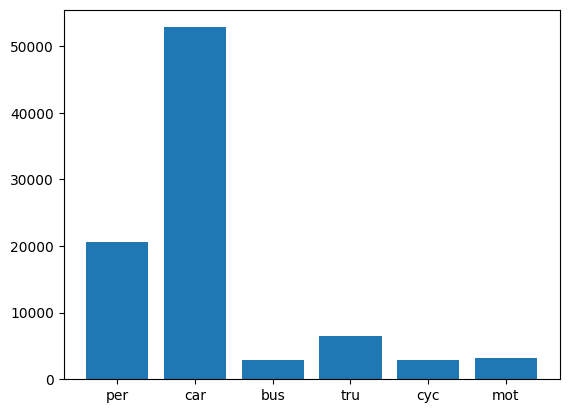

[20605, 52833, 2836, 6438, 2968, 3182]


In [33]:
x = ['per', 'car', 'bus', 'tru', 'cyc', 'mot']
y = [len(per_df), len(car_df), len(bus_df), len(tru_df), len(cyc_df), len(mot_df)]
plt.bar(x, y)
plt.show()

print(y)

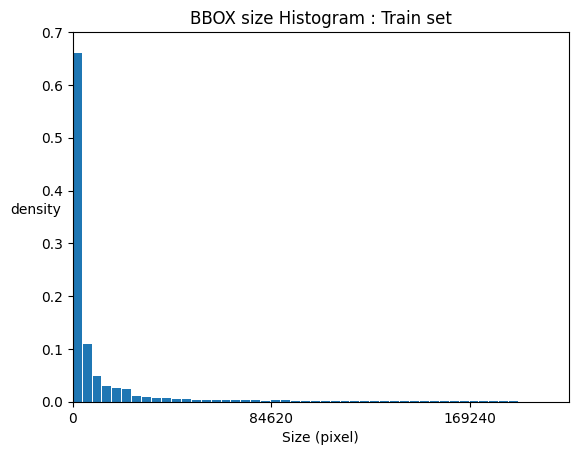

In [49]:
bins = 100
unit = int(423108/bins)
x= range(0, 423108, unit)
sc = MinMaxScaler(feature_range=(0, bins))
train_df['size_scaled'] = sc.fit_transform(train_df[['size']])

plt.hist(train_df['size_scaled'], bins=  bins, cumulative= False, density= True, width = 0.9)
tick_values = np.arange(0, bins + 1, 20)  # 원하는 눈금 위치
new_labels = [int(v * unit) for v in tick_values]  # 각 눈금에 4200 곱한 값으로 설정
plt.xticks(tick_values, new_labels)

plt.xlim([0, bins/2])
plt.ylim([0, 0.7])
plt.xlabel('Size (pixel)')
plt.ylabel('density', rotation= 0)
plt.title('BBOX size Histogram : Train set')
plt.show()

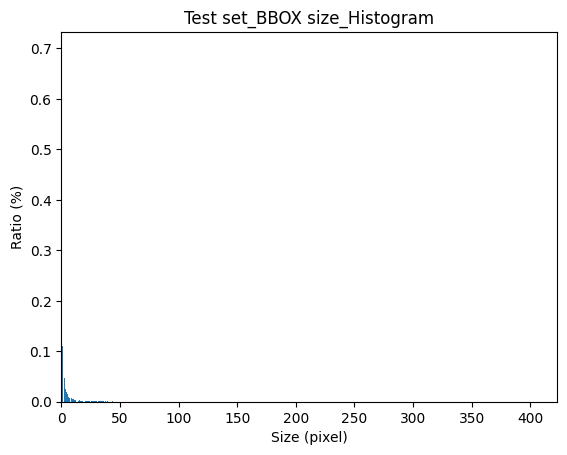

In [35]:
bins = 100
unit = int(423108/bins)
x= range(0, 423108, unit)
sc = MinMaxScaler(feature_range=(0, bins))
test_df['size_scaled'] = sc.fit_transform(test_df[['size']])
x_lim = 100

plt.hist(test_df['size_scaled'], bins=  bins, cumulative= False, density= True, width = 0.8)
# tick_values = np.arange(0, bins + 1, 100)  # 원하는 눈금 위치
# new_labels = [int(v * unit) for v in tick_values]  # 각 눈금에 4200 곱한 값으로 설정
# plt.xticks(tick_values, new_labels)

plt.xlim([0, 423])
plt.xlabel('Size (pixel)')
plt.ylabel('Ratio (%)')
plt.title('Test set_BBOX size_Histogram')
plt.show()

2115.54


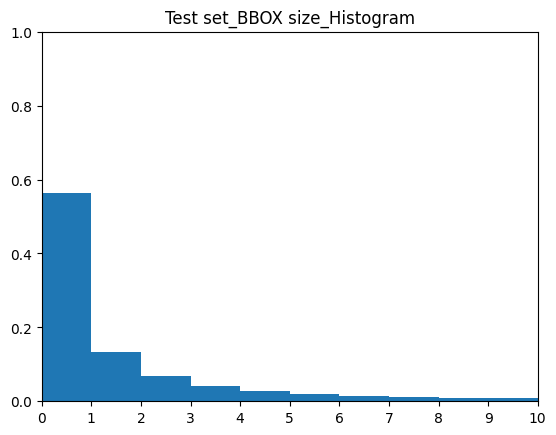

In [36]:
bins = 200
sc = MinMaxScaler(feature_range=(0, bins))
#x_axis = range()
test_df['size_scaled'] = sc.fit_transform(test_df[['size']])

plt.hist(test_df['size_scaled'], bins = bins, cumulative= False, density= True, width = 1)
plt.xticks(np.arange(0, bins, 1))
# plt.xlim([0, bins])
plt.xlim([0, 10])
plt.title('Test set_BBOX size_Histogram')
plt.ylim([0, 1])
print(423108/bins*1)
# print(423108/1000*2)

[15.0278, 15.0244, 14.9344, 27.5303, 27.4831]


Text(0.5, 1.0, 'Test set_BBox size_Histogram')

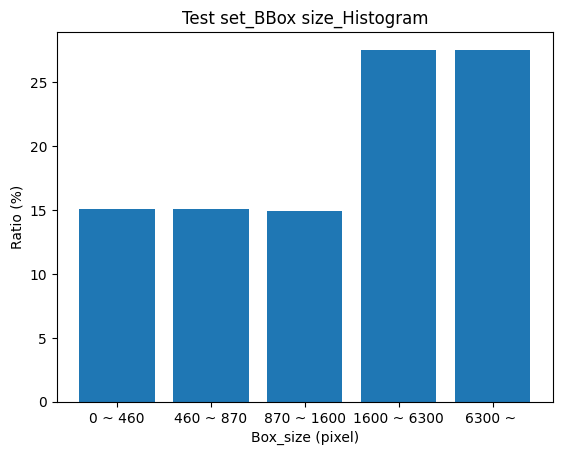

In [37]:
# box_size ratio

section = [460, 870, 1600, 6300]

bar1 = len(true_df[true_df['size'] < section[0]])
bar2 = len(true_df[(section[0] <= true_df['size']) & (true_df['size'] < section[1])])
bar3 = len(true_df[(section[1] <= true_df['size']) & (true_df['size'] < section[2])])
bar4 = len(true_df[(section[2] <= true_df['size']) & (true_df['size'] < section[3])])
bar5 = len(true_df[section[3] <= true_df['size']])
total = len(true_df)
x = [f'0 ~ {section[0]}', f'{section[0]} ~ {section[1]}', f'{section[1]} ~ {section[2]}', f'{section[2]} ~ {section[3]}', f'{section[3]} ~ ']
y = [bar1/total, bar2/total, bar3/total, bar4/total, bar5/total]
y = [round(item*100, 4) for item in y]
print(y)
plt.bar(x, y)
plt.xlabel('Box_size (pixel)')
plt.ylabel('Ratio (%)')
plt.title('Test set_BBox size_Histogram')